# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Сбор и анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 50 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов
* Задача 3 &mdash; 100 баллов

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

На занятии мы уже <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/titanik.html" target="_blank">начинали</a> работать с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных получить некоторое приближенное правило определения, выжил пассажир или нет.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [2]:
df = pd.read_csv('titanik.csv')

Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [3]:
df = df.sample(frac=1)
length = len(df.index)
bigChunkLength = int(length / 10 * 7)
smallChunkLength = length - bigChunkLength
data = df.iloc[0:bigChunkLength]
df = df.iloc[bigChunkLength:length]

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [4]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [5]:
(features_df, target_df) = get_features_and_target(df)
(features_data, target_data) = get_features_and_target(data)

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

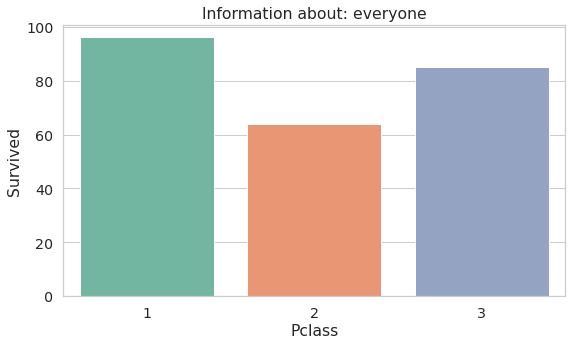

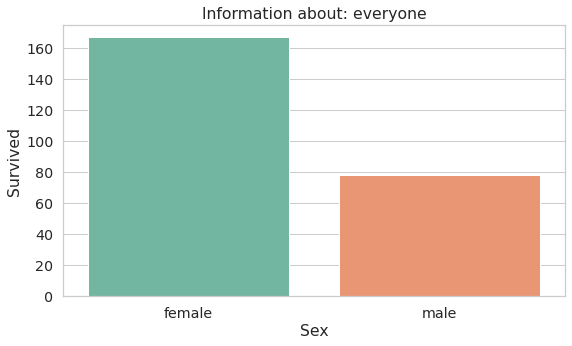

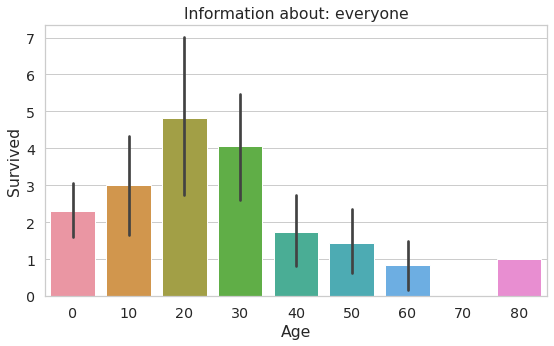

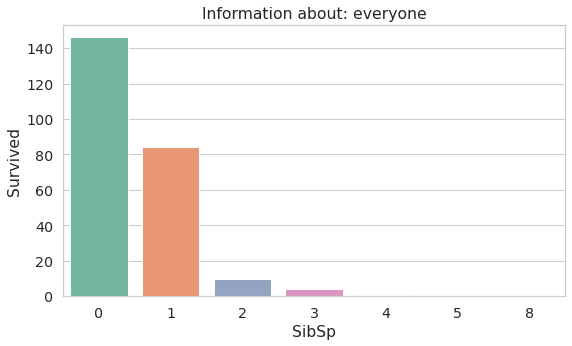

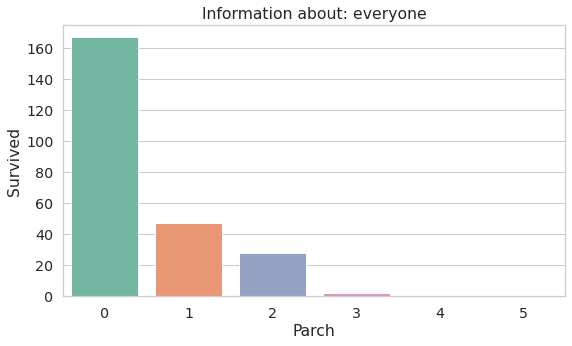

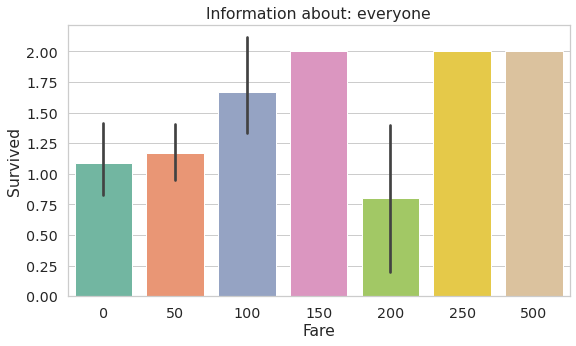

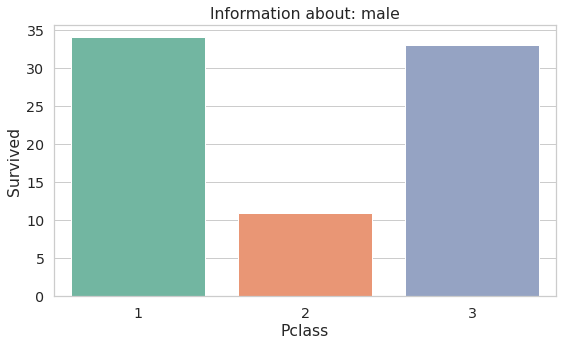

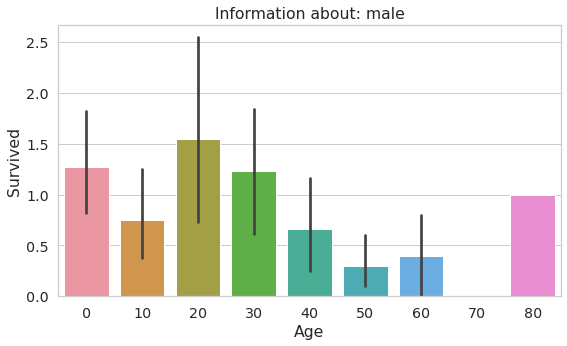

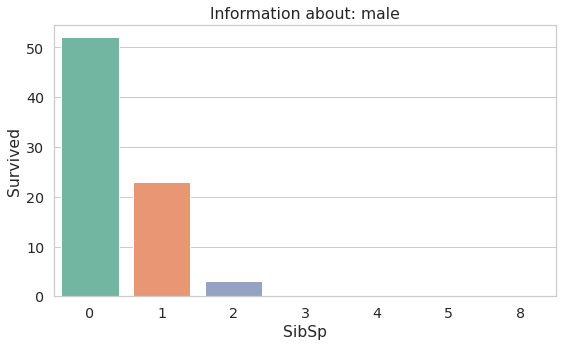

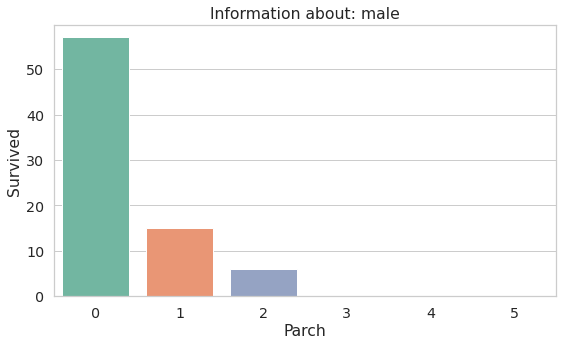

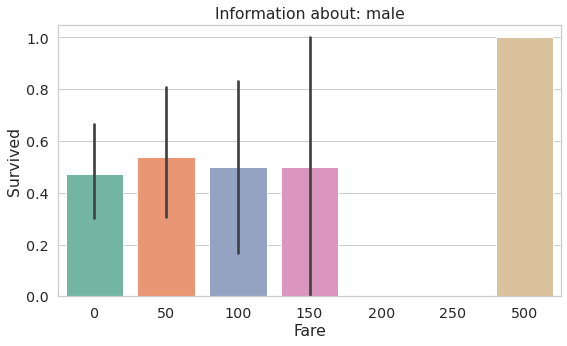

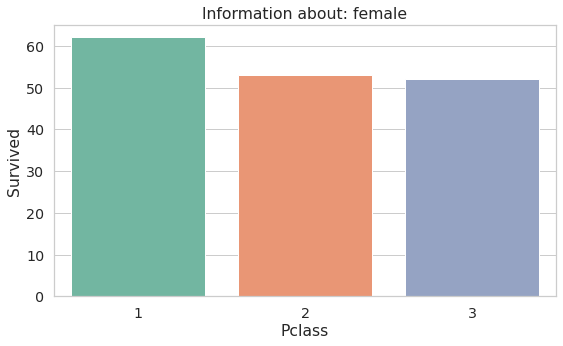

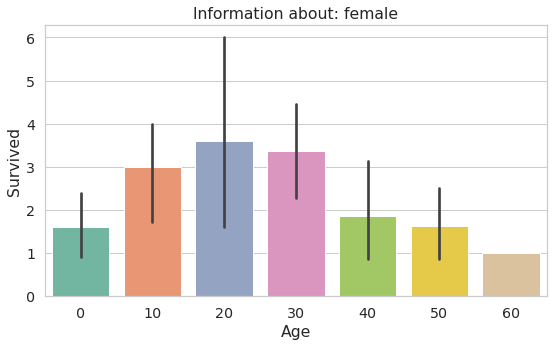

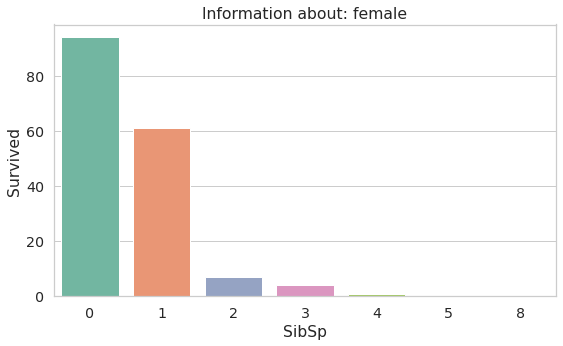

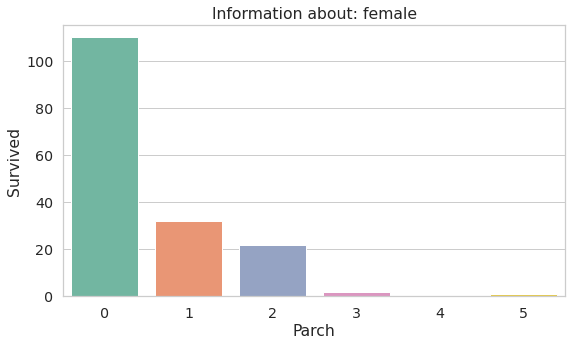

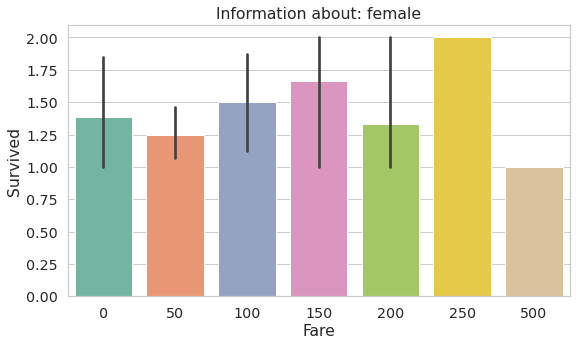

In [6]:
def showInfo(data, info):
    for name in features_data:
        if (info != 'everyone' and name == 'Sex'):
            continue 
        foo = pd.merge(data[name], target_data, left_index=True, right_index=True)
        foo = foo.groupby(name, as_index=False).sum()
        if (name == 'Age'):
            foo['Age'] = foo['Age'] / 10
            foo = foo.astype(int)
            foo['Age'] = foo['Age'] * 10
        if (name == 'Fare'):
            foo['Fare'] = foo['Fare'] / 50
            foo = foo.astype(int)
            foo['Fare'] = foo['Fare'] * 50
        with sns.axes_style('whitegrid'):
            plt.figure(figsize=(9, 5))
            ax = sns.barplot(data=foo, x=name, y='Survived')
            ax.set_title('Information about: ' + info)

showInfo(data, 'everyone')

# По графику стало понятно, что стоит посмотреть на графики отдельно: для мужчин и для женщин.
# Так как количество выживших там сильно различается.
showInfo(data[data['Sex'] == 'male'], 'male')
showInfo(data[data['Sex'] == 'female'], 'female')

#### 3. Классификация

На основе проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков).

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**

Будем рассматривать лишь пол человека. Скажем, что если это мужчина, то он скорее всего умер. Для женщин скажем, что они скорее всего выжили.

**Дерево 2:**

Рассмотрим другой подход. Для молодых людей (<= 40 лет) будем делать вывод по их полу, а для остальных по классу. Идея исходит из того, что различность выживания для полов должна 
проявиться для молодых людей, для остальных же решающим должен быть класс.

Реализуйте полученные деревья по шаблону

In [7]:
def tree_one_level(features):
    predicted = pd.Series(index=features.index, dtype=int)
    for index in predicted.index:
        if (features['Sex'].loc[index] == 'female'):
            predicted.loc[index] = 1
        else:
            predicted.loc[index] = 0
    predicted = predicted.astype(int)
    return predicted

def tree_two_level(features):
    predicted = pd.Series(index=features.index, dtype=int)
    for index in predicted.index:
        if (features['Age'].loc[index] <= 40):
            if (features['Sex'].loc[index] == 'female'):
                predicted.loc[index] = 1
            else:
                predicted.loc[index] = 0
        else:
            if (features['Pclass'].loc[index] == 1):
                predicted.loc[index] = 1
            else:
                predicted.loc[index] = 0
    predicted = predicted.astype(int)
    return predicted

#### 4. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

Оценим долю людей, для которых мы правильно определили исход.

Реализуйте данный критерий по шаблону

In [8]:
def criteria(target, predicted):
    count = 0
    for index in predicted.index:
        if (target.loc[index] == predicted.loc[index]):
            count += 1
    return count / len(predicted.index)

Посчитайте качество полученных ранее деревьев

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [9]:
print("one level:")
print("  input:")
print("  " + str(criteria(target_data, tree_one_level(features_data))))
print("  test:")
print("  " + str(criteria(target_df, tree_one_level(features_df))))
print("two level:")
print("  input:")
print("  " + str(criteria(target_data, tree_two_level(features_data))))
print("  test:")
print("  " + str(criteria(target_df, tree_two_level(features_df))))

one level:
  input:
  0.7897271268057785
  test:
  0.7798507462686567
two level:
  input:
  0.7287319422150883
  test:
  0.753731343283582


#### 5. Выводы

После анализа построенных графиков удалось найти признаки выживания людей. По ним были построены решающие деревья. Первичный признак - пол человека. А также важными оказались возраст, и цена и класс билета.
При этом чаще выживали: женщины, молодые люди, люди с большой ценой билета, люди из первого класса.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="yelp.com">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

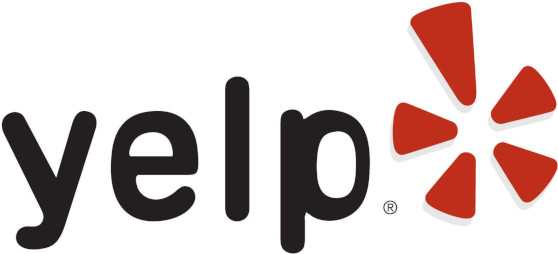

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [10]:
df_business = pd.read_csv('yelp_business.csv')
df_business.head(10)

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...
5,5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NaN,"""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,1,Italian;Restaurants
6,6,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.207430,-115.268460,1,Real Estate Services;Real Estate;Home Services...
7,7,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.197484,-115.249660,1,Shopping;Sporting Goods
8,8,EsMcGiZaQuG1OOvL9iUFug,"""Any Given Sundae""",NaN,"""2612 Brandt School Rd""",Wexford,PA,15090,40.615102,-80.091349,1,Coffee & Tea;Ice Cream & Frozen Yogurt;Food
9,9,TGWhGNusxyMaA4kQVBNeew,"""Detailing Gone Mobile""",NaN,"""""",Henderson,NV,89014,36.055825,-115.046350,1,Automotive;Auto Detailing


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [11]:
foo = df_business.groupby('city', as_index=False).count()
foo = foo[['city', 'name']]
foo = foo.rename(columns={"name": "count"})
foo = foo.sort_values(by = ['count'], ascending=False)
foo.head(5)

,city,count
424,Las Vegas,26775
713,Phoenix,17213
983,Toronto,17206
143,Charlotte,8553
871,Scottsdale,8228


Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

Text(0.5, 1.0, 'Las Vegas business')

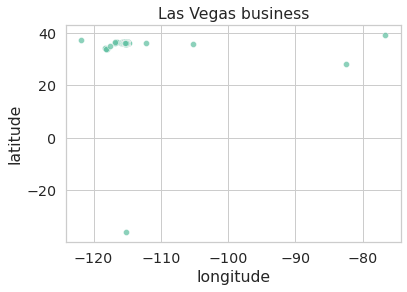

In [12]:
N = foo['city'].iloc[0]
df_business = df_business[df_business['city'] == N]
ax = sns.scatterplot(data=df_business, x='longitude', y='latitude', alpha=0.75)
ax.set_title('Las Vegas business')

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. 

На этом графике должны выделяться некоторые улицы. Откройте карту города `N` и сравните ее с построенным графиком.

*Замечание. Подгружать карту города в качестве фона графика мы научимся чуть позже.*

Text(0.5, 1.0, 'Las Vegas business')

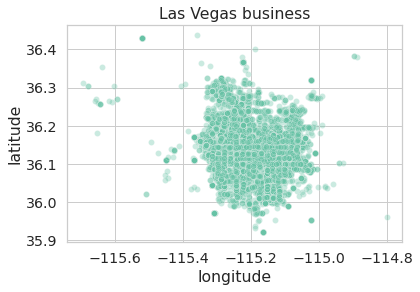

In [13]:
foo = df_business[df_business.longitude.between(-115.7, -114) & df_business.latitude.between(35.8, 40)]
ax = sns.scatterplot(data=foo, x='longitude', y='latitude', alpha=0.34)
ax.set_title('Las Vegas business')

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [14]:
df_review = pd.read_csv('yelp_review.csv')
del df_review['Unnamed: 0']
df_review.head(10)

,business_id,stars
0,AEx2SYEUJmTxVVB18LlCwA,5
1,VR6GpWIda3SfvPC-lg9H3w,5
2,CKC0-MOWMqoeWf6s-szl8g,5
3,ACFtxLv8pGrrxMm6EgjreA,4
4,s2I_Ni76bjJNK9yG60iD-Q,4
5,8QWPlVQ6D-OExqXoaD2Z1g,5
6,9_CGhHMz8698M9-PkVf0CQ,4
7,gkCorLgPyQLsptTHalL61g,4
8,5r6-G9C4YLbC7Ziz57l3rQ,3
9,fDF_o2JPU8BR1Gya--jRIA,5


В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [15]:
df_review = df_review.set_index('business_id').loc[df_business['business_id']]
df_review = df_review.reset_index()
df_review

,business_id,stars
0,kCoE3jvEtg6UVz5SOD3GVw,4
1,kCoE3jvEtg6UVz5SOD3GVw,1
2,kCoE3jvEtg6UVz5SOD3GVw,5
3,kCoE3jvEtg6UVz5SOD3GVw,5
4,kCoE3jvEtg6UVz5SOD3GVw,5
...,...,...
1604222,9ouC6BpmjFpLfHeQnLQqng,5
1604223,9ouC6BpmjFpLfHeQnLQqng,5
1604224,n9a-3YhibkMDUEgncIivHg,5
1604225,n9a-3YhibkMDUEgncIivHg,1


Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [16]:
company_reviews = df_review.groupby('business_id').aggregate([np.mean, np.size])
company_reviews.head(5)

stars      
                            mean  size
business_id                           
--9e1ONYQuAa-CB_Rrw7Tw  4.088904  1451
--DdmeR16TRb3LsjG0ejrQ  3.200000     5
--WsruI0IGEoeRmkErU5Gg  4.928571    14
--Y7NhBKzLTbNliMUX_wfg  4.875000     8
--e8PjCNhEz32pprnPhCwQ  3.473684    19

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [17]:
company_reviews.columns = ['stars', 'count']
company_reviews

,stars,count
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
--DdmeR16TRb3LsjG0ejrQ,3.200000,5
--WsruI0IGEoeRmkErU5Gg,4.928571,14
--Y7NhBKzLTbNliMUX_wfg,4.875000,8
--e8PjCNhEz32pprnPhCwQ,3.473684,19
...,...,...
zzOo9n22fBbKAhbSpMzggA,3.230769,26
zzXuJF6UUT1kgTyCsmgDmQ,5.000000,4
zzjqFOujmM9surbMANZ_ag,5.000000,3


Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [18]:
df_business = df_business.set_index('business_id')
df_business = df_business.join(company_reviews)
df_business = df_business.reindex(columns = ['latitude', 'longitude', 'categories', 'name', 'stars', 'count'])
df_business.head(10)

,latitude,longitude,categories,name,stars,count
business_id,,,,,,
kCoE3jvEtg6UVz5SOD3GVw,36.207430,-115.268460,Real Estate Services;Real Estate;Home Services...,"""BDJ Realty""",4.000000,5
OD2hnuuTJI9uotcKycxg1A,36.197484,-115.249660,Shopping;Sporting Goods,"""Soccer Zone""",1.444444,9
VBHEsoXQb2AQ76J9l8h1uQ,36.085051,-115.119421,Shopping;Jewelry;Watch Repair;Local Services,"""Alfredo's Jewelry""",4.739130,23
1Jp_hmPNUZArNqzpbm7B0g,36.056382,-115.269332,Home Services;Lighting Fixtures & Equipment;Lo...,"""Task Electric""",4.450000,20
DPQnTnNw2PJj7DdENM98Cw,36.105196,-115.056880,Nurseries & Gardening;Home & Garden;Shopping,"""Star Nursery""",3.680000,25
_F3AMoo_zdl-he384ISQbw,36.116965,-115.185696,Arts & Entertainment;Performing Arts,"""Rock of Ages""",4.084507,213
Pd52CjgyEU3Rb8co6QfTPw,36.066914,-115.170848,Nightlife;Bars;Barbeque;Sports Bars;American (...,"""Flight Deck Bar & Grill""",3.769231,13
4srfPk1s8nlm1YusyDUbjg,36.064652,-115.118954,Fast Food;Restaurants;Sandwiches,"""Subway""",2.666667,6
n7V4cD-KqqE3OXk0irJTyA,36.068259,-115.178877,Arcades;Arts & Entertainment;Gastropubs;Restau...,"""GameWorks""",3.117479,349


Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

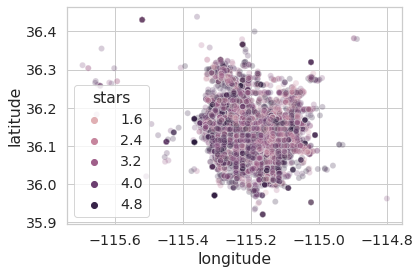

In [19]:
sns.scatterplot(data=df_business[df_business.longitude.between(-115.7, -114) & df_business.latitude.between(35.8, 40)], x='longitude', y='latitude', hue='stars', alpha=0.25)

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [20]:
df_business_exact = df_business.copy()
df_business['longitude'] = np.round(df_business['longitude'] * 4, decimals=1) * 0.25
df_business['latitude'] = np.round(df_business['latitude'] * 4, decimals=1) * 0.25
df_business

,latitude,longitude,categories,name,stars,count
business_id,,,,,,
kCoE3jvEtg6UVz5SOD3GVw,36.200,-115.275,Real Estate Services;Real Estate;Home Services...,"""BDJ Realty""",4.000000,5
OD2hnuuTJI9uotcKycxg1A,36.200,-115.250,Shopping;Sporting Goods,"""Soccer Zone""",1.444444,9
VBHEsoXQb2AQ76J9l8h1uQ,36.075,-115.125,Shopping;Jewelry;Watch Repair;Local Services,"""Alfredo's Jewelry""",4.739130,23
1Jp_hmPNUZArNqzpbm7B0g,36.050,-115.275,Home Services;Lighting Fixtures & Equipment;Lo...,"""Task Electric""",4.450000,20
DPQnTnNw2PJj7DdENM98Cw,36.100,-115.050,Nurseries & Gardening;Home & Garden;Shopping,"""Star Nursery""",3.680000,25
...,...,...,...,...,...,...
swjz4q8gI79Ndg4APuHEUA,36.125,-115.225,Real Estate Services;Home Services;Property Ma...,"""Stonegate Real Estate Services""",4.466667,15
pUhU5ohYv65g8B47dTXAKA,36.175,-115.125,Coffee & Tea;Food,"""Starbucks""",2.400000,35
sH9WsMj8sNTTSAUWv4UEEg,36.050,-115.250,Mobile Phone Accessories;Mobile Phones;Electro...,"""Sprint Store""",3.857143,35


Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

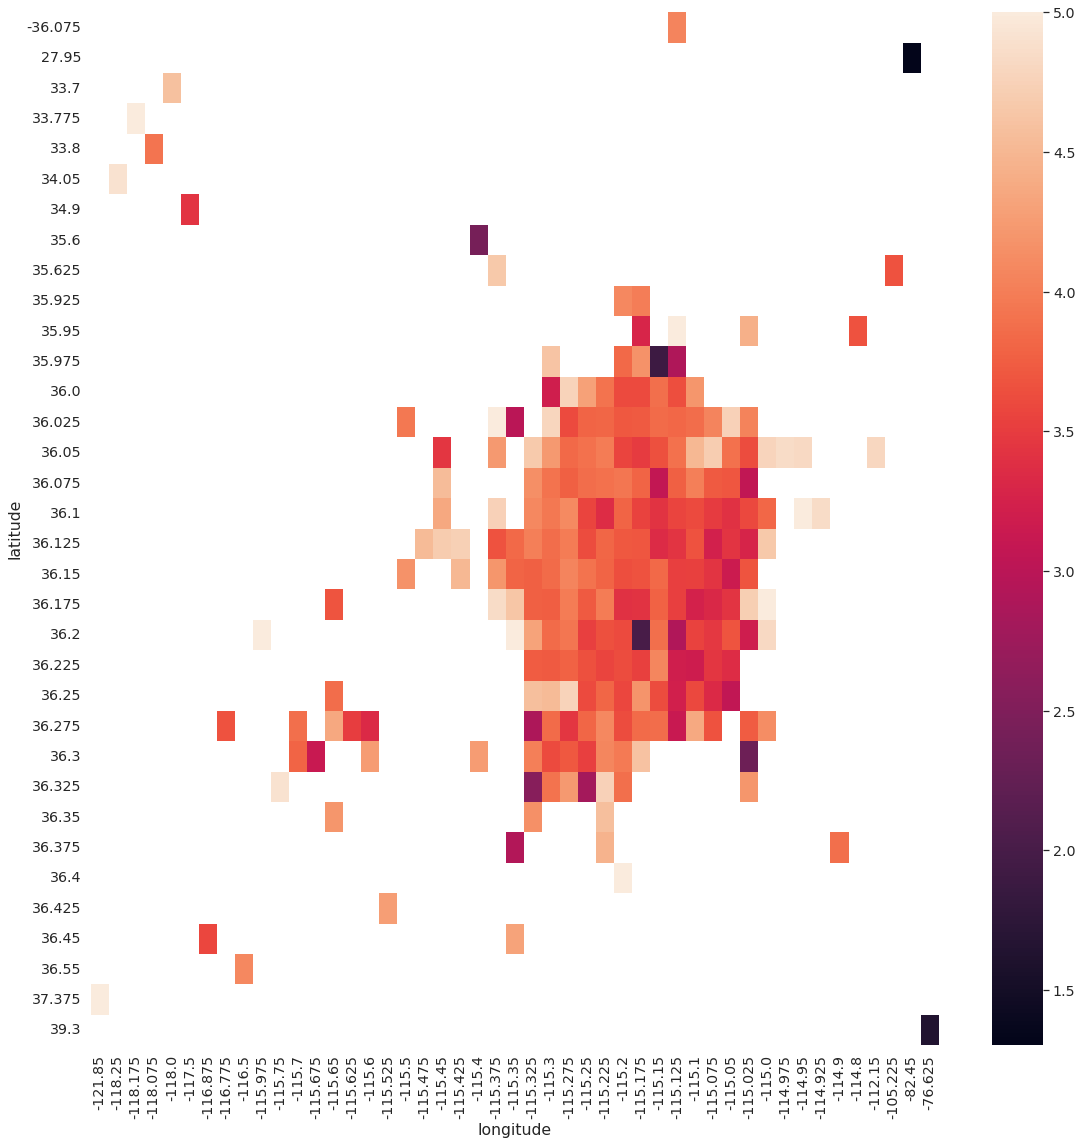

In [21]:
foo = pd.pivot_table(data=df_business, values='stars', index=['latitude'], columns=['longitude'], aggfunc=np.mean)
plt.figure(figsize=(19, 19))
sns.heatmap(foo)

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:**
Не стоит рассматривать районы с малым числом компаний, так как оценки в таких районах не очень информативны (слишком маленькая выборка). При автоматической настройке гаммы может получится так, что большинство точек графика станут одного цвета, пропадет информативность, будут видны только лишь экстремумы.

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

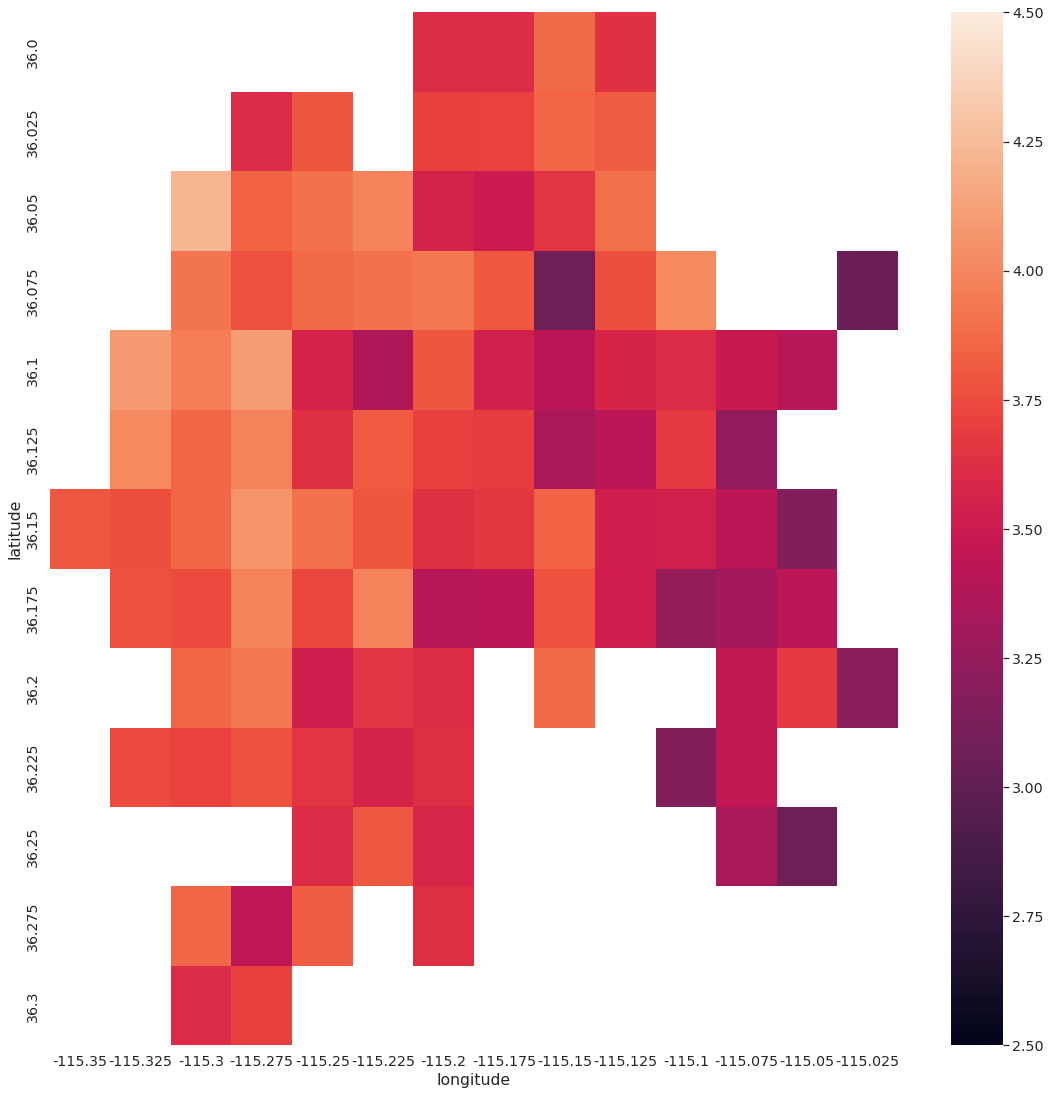

In [22]:
foo = df_business.groupby(by=['latitude', 'longitude'], as_index=False).aggregate({'count': ['count'], 'stars': ['mean']})
foo.columns=['latitude', 'longitude', 'count', 'stars']
foo = foo[foo['count'] >= 30]

foo = pd.pivot_table(data=foo, values='stars', index=['latitude'], columns=['longitude'], aggfunc=np.mean)
plt.figure(figsize=(19, 19))
sns.heatmap(foo, vmin=2.5, vmax=4.5)

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:**
График стал лучше, так как отбросились неинформативные районы, из-за чего округ сильно уменьшился. Новый диапазон цветов информативнее, сразу стало видно различие оценок между юго-восточной частью и северо-западной. На северо-западе оценки выше.

Можно сделать вывод, что нужно внимательно отбирать данные для графика (только информативные), а также правильно его строить, чтобы отобрать корректные данные.

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

/tmp/ipykernel_60962/2284724693.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo['longitude'] = np.round(foo['longitude'] * 4, decimals=1) * 0.25
/tmp/ipykernel_60962/2284724693.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo['latitude'] = np.round(foo['latitude'] * 4, decimals=1) * 0.25


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

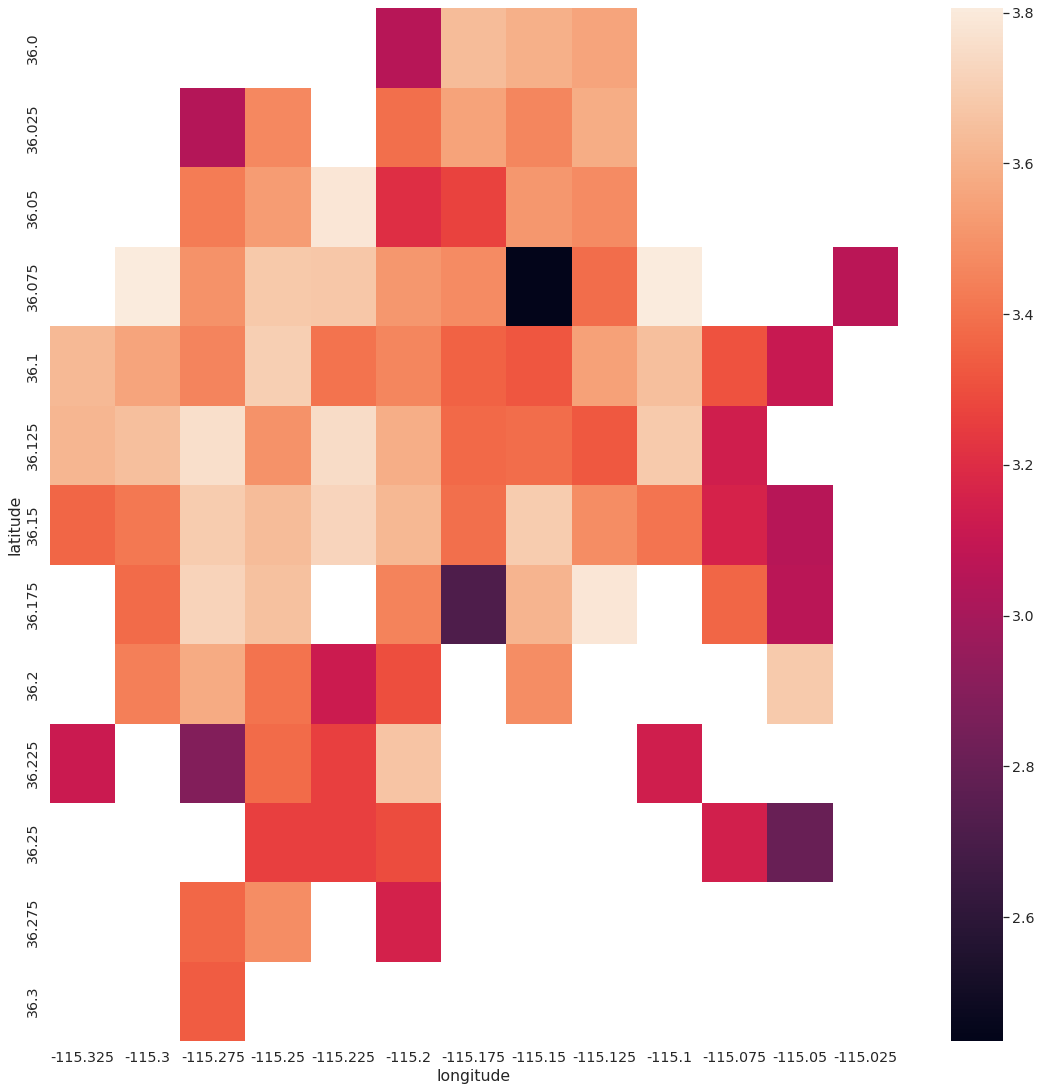

In [23]:
df_business_exact['categories'] = df_business_exact['categories'].str.lower()
df_rest = df_business_exact[df_business_exact['categories'].str.find('restaurant') != -1]
foo = df_rest[df_rest['count'] >= 5]

foo['longitude'] = np.round(foo['longitude'] * 4, decimals=1) * 0.25
foo['latitude'] = np.round(foo['latitude'] * 4, decimals=1) * 0.25

foo = foo.reindex(columns = ['latitude', 'longitude', 'count', 'stars'])
foo = foo.groupby(by=['latitude', 'longitude'], as_index=False).aggregate({'count': ['count'], 'stars': ['mean']})
foo.columns = ['latitude', 'longitude', 'count', 'stars']
foo = foo[foo['count'] >= 10]

foo = pd.pivot_table(data=foo, values='stars', index=['latitude'], columns=['longitude'], aggfunc=np.mean)
plt.figure(figsize=(19, 19))
sns.heatmap(foo)

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** 
Как и в случае выше, они позволяют отбросить неинформативную информацию, сделать график более полезным, информативным.

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [24]:
foo = df_rest[df_rest['count'] >= 50]
foo = foo.reset_index()
foo = foo.reindex(columns=['name', 'stars', 'count', 'latitude', 'longitude', 'categories'])
foo = foo.sort_values(by=['stars'], ascending=False)
foo = foo.reset_index()
del foo['index']
print(foo.head(10))

                            name     stars  count   latitude   longitude  \
0    "Lip Smacking Foodie Tours"  4.966480    179  36.114537 -115.172678   
1                 "Pepito Shack"  4.907692     65  36.152477 -115.151945   
2               "Bosa Boba Cafe"  4.890909     55  36.125960 -115.184846   
3                 "Garden Grill"  4.868132     91  36.166783 -115.286197   
4                 "Brew Tea Bar"  4.848069   1165  36.054195 -115.242443   
5               "Poppa Naps BBQ"  4.836538    104  36.116549 -115.088115   
6               "Zenaida's Cafe"  4.833333    180  36.101741 -115.100359   
7   "El Frescos Cocina Mexicana"  4.816754    191  36.098527 -115.148446   
8  "Blaqcat Ultra Hookah Lounge"  4.809524     63  36.159742 -115.232738   
9     "California Sushi Burrito"  4.807018     57  36.125636 -115.202487   

                                          categories  
0  food tours;restaurants;event planning & servic...  
1  restaurants;burgers;food stands;sandwiches;hot... 

Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

/tmp/ipykernel_60962/3462356884.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo['isTop10'].iloc[0:10] = 1


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

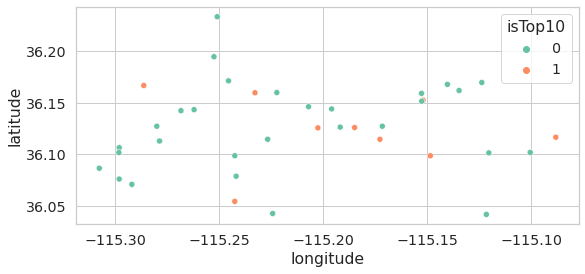

In [25]:
foo['isTop10'] = pd.Series(index=foo.index, dtype=int)
foo = foo[foo['stars'] >= 4.7]
foo['isTop10'] = 0
foo['isTop10'].iloc[0:10] = 1

plt.figure(figsize=(9, 4))
sns.scatterplot(data=foo, x='longitude', y='latitude', hue='isTop10')

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:**
Согласно графикам, услуги на северо-западе и западе качественнее, если судить по оценкам клиентов. Лучшие рестораны расположены относительно равномерно. Кот Василий посещает лучшие рестораны по всему Лас-Вегасу.

---
### Задача 3.

В данной задаче вам предстоит распарсить сайт, который вы выберите.

**1.** Каждая ссылка (URL) в интернете состоит из нескольких компонент:

* схема, *например, `http` или `https`*,
* хост, *наример, `en.wikipedia.org`*
* путь, по которому находится информация,
* параметры,
* якорь &mdash; указание фрагмента страницы.

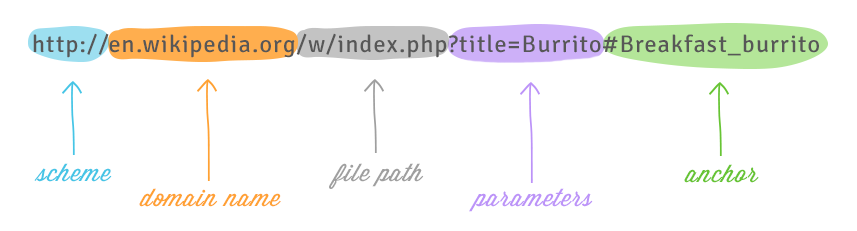

Одна и та же ссылка может иметь несколько форм и вести на ту же самую страницу. Во время обхода сайта это надо учитывать и сохранять один уникальный урл для каждой страницы. Процедура, приводящая урл к каноничному виду, называется нормализацией.
Процедуры, которые применяются к урлу для нормализации, описаны, например, на <a target="_blank" href="https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_URL">Википедии</a>.

Установите пакет `url_normalize`, в котором есть готовая функция для нормализации.

Прочитайте, как именно функция `url_normalize` меняет ссылку, и приведите примеры $4$ урлов, которые нормализуются к одному и тому же. Примеры должны демонстрировать различные этапы процедуры нормализации. Одним из этих примеров может быть сам нормализованный урл.

In [26]:
from url_normalize import url_normalize

In [27]:
print(url_normalize('https://www.GOOgle.com////////a/../'))
print(url_normalize('https://www.GOOgle.com/a/../'))
print(url_normalize('https://www.GOOgle.com'))
print(url_normalize('https://www.google.com'))

https://www.google.com/
https://www.google.com/
https://www.google.com/
https://www.google.com/


_____________
Изучите код, в котором скачиваются страницы сайта `simple.wikipedia.org` с <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/data_parsing.html">занятия про парсинг данных</a> и **скопируйте его в решение данной задачи**. Код, реализующий обход в ширину с фильтрацией и нормализацией урлов, приведён в виде функции.

In [28]:
from urllib.parse import urlparse, urldefrag, urljoin
from urllib.request import urlopen
from bs4 import BeautifulSoup
from queue import Queue
import time

SEED = "https://simple.wikipedia.org/wiki/Data_science"

def download_from_the_internet(url):
    '''Скачивает сраницу с интернета

    Параметры:
        url (str) - ссылка на страницу для скачивания

    Возвращает:
        str - html-страница в виде строки, None в случае неудачи
    '''
    try:
        return urlopen(url).read().decode('utf-8')
    except KeyboardInterrupt:
        raise
    except:
        return None

    
def extract_links_from_html(url, html):
    '''Парсит ссылки на странице

    Принимает:
        url (str) - исходный урл страницы
        html (str) - содержание html-страницы

    Возвращает:
        list - список ссылок, находящихся на странице
    '''
    parser = BeautifulSoup(html)
    # Формируем ссылки на те страницы, на которые ссылается документ
    return [urljoin(url, link.get('href')) for link in parser.findAll('a')]


def extract_text_info_from_html(html):
    '''Парсит текстовую информацию на странице

    Принимает:
         html (str) - содержание html-страницы

    Возвращает:
        dict - текстовая часть страницы по ключу text,
               название по ключу title
    '''
    soup = BeautifulSoup(html, features="html.parser")
    for script in soup(["script", "style"]):
        script.extract()
    
    # Объединяем строки текста
    text = soup.get_text()
    lines = (line.strip() for line in text.splitlines())
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    text = '\n'.join(chunk for chunk in chunks if chunk)

    # Находим название на странице
    title = soup.find('title').string
    
    return {'text': text, 'title': title}
    

def is_wiki_article(url):
    '''Проверяет, является ли ссылка страницей на simple.wikipedia'''
    if 'simple.wikipedia' not in url:
        return False
    
    prohibited = ['Category', 'Special', 'Wikipedia',
                  'php', 'Help']
    
    # Проверяем, есть ли запрещённые строки в ссылке
    for token in prohibited:
        if token in url:
            return False
        
    return True



Код обхода в ширину:

In [29]:
def smart_normalize(url):
    url = url_normalize(url)
    position = url.find('#')
    if position != -1:
        url = url[0:position]
    position = url.find('?')
    if position != -1:
        url = url[0:position]
    return url   

def load_web_pages(seed, max_downloads, filtration_function):
    '''Обходит web-страницы в ширину и загружает информацию о них.
    
    Принимает:
        seed (str) -- страница, с которой начинать обход.
        max_downloads (int) -- максимальное число загруженных страниц.
        filtration_function (str -> bool) -- функция, указывающая, 
            стоит ли загружать страницу. Пример: is_wiki_article.
            
    Возвращает:
        pages_json (list) - список словарей с информацией о страницах.
    '''
    
    # Создаём список со страницами
    pages_json = []
    
    # Создаём очередь для обхода в ширину
    q = Queue()
    q.put(seed)

    already_visited = set()
    n_downloads = 0
    time_start = time.time()

    while not q.empty():
        # Нормализуем урл
        main_url = smart_normalize(q.get())
        if main_url in already_visited:
            continue
        already_visited.add(main_url)
        html = download_from_the_internet(main_url)

        # Извлекаем ссылки из страницы
        children_links = extract_links_from_html(main_url, html)
        time.sleep(1)

        # Извлекаем текст страницы
        text_info = extract_text_info_from_html(html) 

        # Добавляем запись в таблицу
        text_info['url'] = main_url
        pages_json.append(text_info)

        n_downloads += 1
        if n_downloads > max_downloads:
            break
        # Добавляем ещё не посещённые ссылки в очередь
        for child in children_links:
            if smart_normalize(child) not in already_visited \
            and filtration_function(child):
                q.put(child)
                
    return pages_json

**2.** Выберите достаточно крупный сайт, который вам интересен, а также некоторую категорию страниц в нём. Поймите, с какой страницы сайта надо начать обход, чтобы обходить сайты данной категории.

*Пример: ищем статьи про Data Science на Википедии, начинаем со статьи Data Dcience*.

**Укажите, что выбрали:** <...>

Придумайте критерий, который по тексту из HTML-страницы будет определять, находится ли страница в определённой вами категории.

*Пример: статья на Википедии про Data Science, если в ней есть слово "data" или термины из статистики, теории вероятностей и анализа данных*.

**Опишите критерий:** <...>

Начав с выбранной страницы, скачайте не менее $500$ страниц сайта. В качестве функции фильтрации возьмите функцию, которая отделяет страницы с выбранного сайта от других.

In [30]:
#start_page = 'https://simple.wikipedia.org/wiki/Chess_master_titles'
#pages = load_web_pages(start_page, 500, is_wiki_article)

Cделайте `pandas`-таблицу со следующей информацией:

* количество слов в тексте статьи;
* принадлежит ли страница выбранной категории.

Для последнего пункта можете воспользоваться функцией поиска слов по заданным префиксам, рассмотренной на <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/data_parsing.html">занятии</a>.

In [31]:
PREFIXES = [
    'grandmaster',
    'chess',
    'elo',
    'fide',
]

def is_about_chess_player(text):
    if '.jpg' in text:
        return False

    text_words = text.split(' ')
    text_words = [x.lower() for x in text_words]

    for x in text_words:
        for prefix in PREFIXES:
            if x.startswith(prefix):
                return True
    return False


df = pd.DataFrame(pages)
info_df = df.copy()
info_df['words'] = pd.Series(index=info_df.index, dtype=int)
info_df['flag'] = pd.Series(index=info_df.index, dtype=int)

info_df['words'] = info_df.index
info_df['words'] = info_df['words'].apply(lambda x: len(info_df['text'].iloc[x].split(' ')))

def calc(x):
    return is_about_chess_player(info_df['text'].iloc[x])

info_df['flag'] = info_df.index
info_df['flag'] = info_df['flag'].apply(calc)
info_df

NameError: name 'pages' is not defined

Определите, какой процент скачанных страниц принадлежит выбранной категории?

In [ ]:
print(info_df['flag'].sum() / info_df.index.size)

0.43137254901960786


C помощью гистограмм сравните визуально распределения количества слов в статьях из выбранной категории и во всех остальных. Для этих двух распределений вычислите средние, медианы и дисперсии. Средние и медианы отобразите на графиках с гистограммами. Сделайте выводы.

TypeError: text() missing 2 required positional arguments: 'x' and 'y'

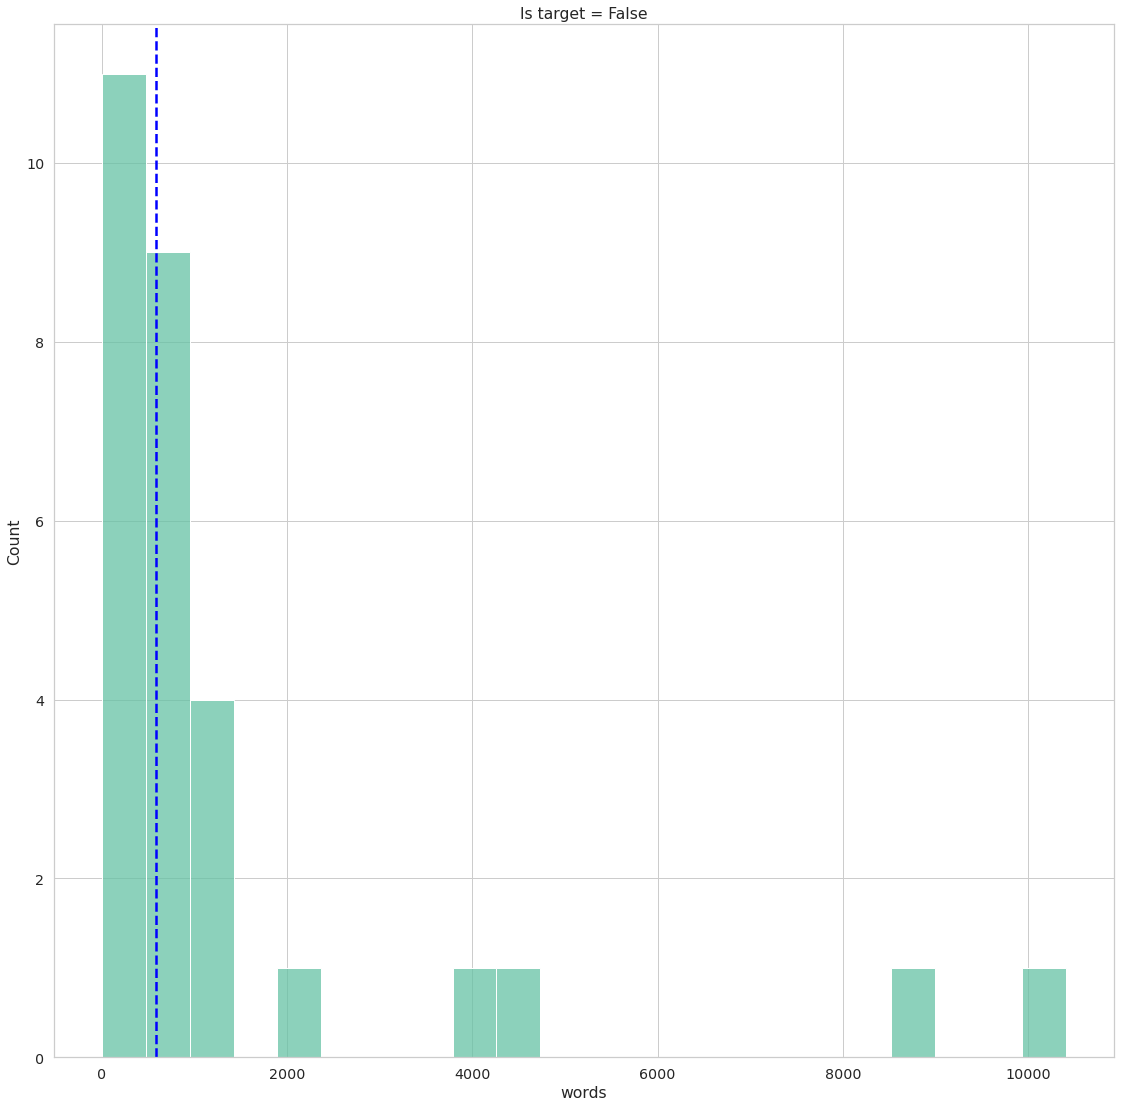

In [ ]:
for flag in [False, True]:
    plt.figure(figsize=(19, 19))
    foo = info_df[info_df['flag'] == flag]['words']
    ax = sns.histplot(data=foo)
    ax.set_title('Is target = ' + str(flag))

    plt.axvline(x=foo.median(), color='blue', ls='--', lw=2.5)
    plt.text(x=foo.median() * 1.2, y=10, s='median', color='blue', fontsize=19)

    plt.axvline(x=foo.mean(), color='red', ls='--', lw=2.5)
    plt.text(x=foo.mean() * 1.2, y=10, s='mean', color='red', fontsize=19)
    plt.show()

Постройте boxplot-графики для того, чтобы сравнить эти 2 распределения. Какой способ сравнения кажется вам более удобным?

In [ ]:
...

**3.** Визуализируйте скачанные страницы сайта. В качестве значений по осям возьмите количество слов на странице и количество ссылок на ней. Цветом обозначьте принадлежность выбранной вами категории. 

In [ ]:
...

**4.** Предложите функцию фильтрации web-страниц, которую нужно подать в `load_web_pages`, чтобы среди скачанных сайтов был больше процент страниц из выбранной вами категории.

In [ ]:
def filter(url):
    if is_wiki_article(url) == False:
        return False

Скачайте снова не менее $500$ страниц, но уже с новой функцией фильтрации. Добавьте следующую информацию к каждой странице:

* глубина в обходе,
* время скачивания страницы.

Для замера времени можете воспользоваться функцией `time` из пакета `time`.

In [ ]:
...

Постройте гистограмму для времени скачивания страницы.

In [ ]:
...

Предположите, каким известным вам стандартным распределением оно может быть приближено? 

In [ ]:
...

**Выводы:** <...>